In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
from collections import Counter
import math

In [17]:
path = "dataset/train.csv"
df = pd.read_csv(path)
# df.dropna(subset=['rain_sum (mm)'], axis=0, inplace=True)
# df = df.reset_index().drop(columns='index')
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su


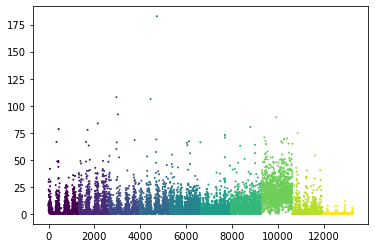

In [18]:
uniqcity = Counter(df.city)
mapping = {}
for i,city in enumerate(uniqcity):
    mapping[city] = i
colorlist = list(map(mapping.get, df.city))
plt.scatter(df.index,df.iloc[:,8],c=colorlist,s=1)

In [19]:
avg_wind_percity = []
avg_wind = df[['winddirection_10m_dominant (°)','city']].groupby(by='city').mean()

for city in uniqcity :
    index_range = df.loc[df['city'] == city].index
    # validnum = sum(map(lambda x : not math.isnan(df.iloc[x,12]), index_range))
    avg_wind_percity = avg_wind.loc[city][0]
    for i in index_range :
        df.iloc[i,12] = avg_wind_percity if math.isnan(df.iloc[i,12]) else df.iloc[i,12]
    

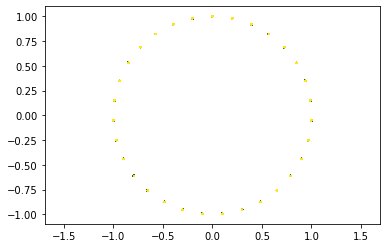

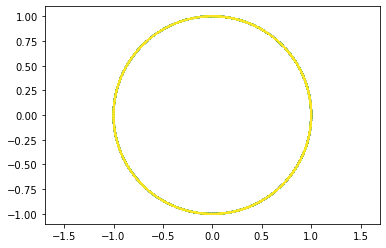

In [20]:
cols = df.columns
df[cols[0]] = df[cols[0]].astype('string')
#encode date
yearis = []
monthis = []
dayis = []
for row in df.index :
    yearis.append(int(df[cols[0]][row].split('-')[0]))
    monthis.append(int(df[cols[0]][row].split('-')[1]))
    dayis.append(int(df[cols[0]][row].split('-')[2])) 

min(yearis),min(monthis),min(dayis)
mincount  = min(yearis)*365 + min(monthis)*30 + min(dayis)*1

daysince = []
for row in df.index :
    dateval = yearis[row]*365 + monthis[row]*30 + dayis[row]*1
    datecount = dateval-mincount
    daysince.append(datecount)

maxday = max(dayis)
maxdmo = max(dayis)*max(monthis)
dayval = pd.Series(daysince)

sinday = np.sin(2*np.pi*dayval/maxday)
cosday = np.cos(2*np.pi*dayval/maxday)
sindmo = np.sin(2*np.pi*dayval/maxdmo)
cosdmo = np.cos(2*np.pi*dayval/maxdmo)

plt.scatter(sinday,cosday,c=colorlist,s=1)
plt.axis('equal')
plt.show()
plt.scatter(sindmo,cosdmo,c=colorlist,s=1)
plt.axis('equal')
plt.show()

In [21]:
min(yearis), min(monthis), min(dayis)

(2018, 1, 1)

In [22]:
dateset = pd.DataFrame({'daysince': daysince, 'sinday': sinday, 'cosday': cosday, 'sindmo': sindmo, 'cosdmo': cosdmo, 'year' : yearis})

In [23]:
rise = df['sunrise (iso8601)']
set = df['sunset (iso8601)']

In [24]:
#encode rise and set
riseencode = []
setencode = []
validrise = []
validset = []

risehour = []
risemin = []
riseval = []
sethour = []
setmin = []
setval = []

for row in df.index :
    riseencode.append(datetime.fromisoformat(rise[row]).strftime("%m:%d:%Y:%H:%M:%S"))
    setencode.append(datetime.fromisoformat(set[row]).strftime("%m:%d:%Y:%H:%M:%S"))
    validrise.append(True) if '01:01:1970' in riseencode[row] else validrise.append(False)
    validset.append(True) if '01:01:1970' in setencode[row] else validset.append(False)

    if validrise[row] == False :
        riseencode[row] = riseencode[row][-8:].split(':')
    else :
        riseencode[row] = '00:00:00'.split(':')

    if validset[row] == False :
        setencode[row] = setencode[row][-8:].split(':')
    else :
        setencode[row] = '00:00:00'.split(':')
    
    risehour.append(int(riseencode[row][0]))
    risemin.append(int(riseencode[row][1]))

    sethour.append(int(setencode[row][0]))
    setmin.append(int(setencode[row][1]))

    riseval.append(risehour[row]*60 + risemin[row])
    setval.append(sethour[row]*60 + setmin[row])

In [25]:
index_range = df.loc[df['city'] == 'q'].index
validnum = sum(map(lambda x: riseval[x] != 0, index_range))

avgrise = sum(riseval[min(index_range):max(index_range)])//validnum
avgset = sum(setval[min(index_range):max(index_range)])//validnum

for row in df.index :
    riseval[row] = avgrise if riseval[row] == 0 else riseval[row]
    setval[row] = avgset if setval[row] == 0 else setval[row]

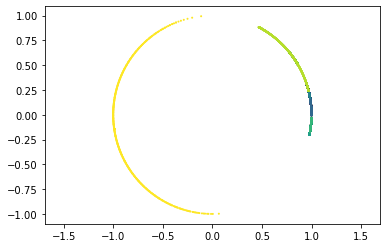

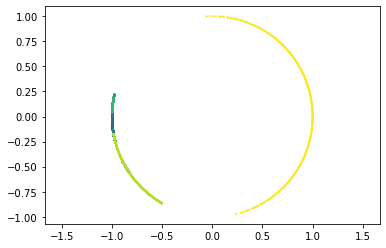

In [26]:
minperday = 24*60
riseval = pd.Series(riseval)
setval = pd.Series(setval)

sinrise = np.sin(2*np.pi*riseval/minperday)
cosrise = np.cos(2*np.pi*riseval/minperday)
sinset = np.sin(2*np.pi*setval/minperday)
cosset = np.cos(2*np.pi*setval/minperday)

plt.scatter(sinrise,cosrise,c=colorlist,s=1)
plt.axis('equal')
plt.show()
plt.scatter(sinset,cosset,c=colorlist,s=1)
plt.axis('equal')
plt.show()

In [27]:
riseset = pd.DataFrame({'sinrise': sinrise, 'cosrise': cosrise, 'sinset': sinset, 'cosset': cosset })
addset = dateset.join(riseset)
addset

,daysince,sinday,cosday,sindmo,cosdmo,year,sinrise,cosrise,sinset,cosset
0,0,0.000000,1.000000,0.000000,1.000000,2018,0.980785,0.195090,-0.998848,-0.047978
1,1,0.201299,0.979530,0.016889,0.999857,2018,0.980785,0.195090,-0.999048,-0.043619
2,2,0.394356,0.918958,0.033774,0.999429,2018,0.981627,0.190809,-0.999048,-0.043619
3,3,0.571268,0.820763,0.050649,0.998717,2018,0.981627,0.190809,-0.999048,-0.043619
4,4,0.724793,0.688967,0.067510,0.997719,2018,0.982450,0.186524,-0.999229,-0.039260
...,...,...,...,...,...,...,...,...,...,...
13253,1813,0.101168,-0.994869,-0.713053,0.701110,2022,-0.990268,-0.139173,0.994056,0.108867
13254,1814,-0.101168,-0.994869,-0.701110,0.713053,2022,-0.990268,-0.139173,0.994056,0.108867
13255,1815,-0.299363,-0.954139,-0.688967,0.724793,2022,-0.990268,-0.139173,0.994056,0.108867
13256,1816,-0.485302,-0.874347,-0.676627,0.736326,2022,-0.990268,-0.139173,0.994056,0.108867


In [28]:
newdf = df
newdf = pd.concat([newdf.drop(columns=['time','sunrise (iso8601)','sunset (iso8601)']), addset],axis=1)
newdf = pd.get_dummies(newdf, columns=['city'])
newdf.corr()['rain_sum (mm)'].sort_values().to_frame()

,rain_sum (mm)
windspeed_10m_max (km/h),-0.333069
shortwave_radiation_sum (MJ/m²),-0.256751
city_q,-0.217606
cosset,-0.205043
sinset,-0.200811
et0_fao_evapotranspiration (mm),-0.196993
city_sa,-0.137587
snowfall_sum (cm),-0.094655
city_lh,-0.076902
city_u,-0.065119


In [130]:
newdf
# newdf.to_csv('preproc1.csv')

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),...,city_b,city_le,city_lh,city_p,city_q,city_sa,city_si,city_su,city_t,city_u
0,29.9,26.0,36.3,31.6,17.59,7.7,0.0,6.9,20.2,277.000000,...,0,0,0,0,0,0,0,1,0,0
1,30.6,25.7,37.7,31.2,19.87,9.4,0.0,7.1,18.0,168.000000,...,0,0,0,0,0,0,0,1,0,0
2,31.8,25.9,40.3,31.7,20.44,7.8,0.0,8.1,21.2,125.000000,...,0,0,0,0,0,0,0,1,0,0
3,30.8,26.0,39.1,31.6,20.44,29.7,0.0,7.2,21.6,190.000000,...,0,0,0,0,0,0,0,1,0,0
4,30.9,25.2,37.6,29.9,20.10,22.5,0.0,6.9,21.2,241.000000,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.983908,...,0,0,0,0,1,0,0,0,0,0
13254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.983908,...,0,0,0,0,1,0,0,0,0,0
13255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.983908,...,0,0,0,0,1,0,0,0,0,0
13256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.983908,...,0,0,0,0,1,0,0,0,0,0


In [128]:
hourdf = pd.read_csv('trainhourproc.csv')
hourdf.drop(columns=['time','city','snowfall (cm)','et0_fao_evapotranspiration (mm)'],inplace=True)
hourdf

,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),...,windgusts_10m (km/h),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,26.404167,87.000000,24.058333,33.604167,1006.483333,1008.783333,73.041667,31.750000,29.041667,90.791667,...,11.700000,0.462500,28.529167,28.591667,28.700000,29.270833,0.297917,0.300292,0.282667,0.280000
1,26.466667,85.875000,23.837500,33.741667,1006.987500,1009.287500,62.833333,30.291667,17.625000,92.500000,...,11.591667,0.514583,28.708333,28.637500,28.704167,29.200000,0.315708,0.312250,0.287125,0.280000
2,27.145833,84.000000,24.150000,34.462500,1007.212500,1009.512500,64.041667,25.625000,20.375000,96.958333,...,11.954167,0.604583,28.954167,28.833333,28.737500,29.200000,0.298917,0.304750,0.291792,0.280500
3,26.570833,86.916667,24.129167,33.758333,1007.950000,1010.250000,58.916667,23.625000,23.791667,80.750000,...,11.850000,0.484167,29.091667,28.975000,28.812500,29.200000,0.321917,0.317625,0.295083,0.281042
4,26.645833,85.458333,23.912500,33.237500,1008.075000,1010.375000,52.208333,17.750000,13.166667,94.375000,...,12.700000,0.541667,28.895833,28.908333,28.858333,29.200000,0.325458,0.337000,0.314375,0.282792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,-24.933333,47.791667,-32.866667,-28.825000,1038.129167,997.329167,71.666667,73.041667,7.583333,4.333333,...,11.608333,0.043750,-11.762500,-11.237500,-9.879167,-8.316667,0.264000,0.205000,0.237000,0.252000
13254,-23.937500,44.125000,-32.733333,-28.325000,1030.137500,989.716667,95.375000,57.500000,78.000000,66.416667,...,11.112500,0.048333,-12.062500,-11.537500,-10.062500,-8.400000,0.264000,0.205000,0.237000,0.252000
13255,-22.816667,53.416667,-29.704167,-26.083333,1022.075000,982.266667,98.916667,87.291667,77.708333,41.125000,...,8.808333,0.045417,-12.000000,-11.600000,-10.245833,-8.433333,0.264000,0.205000,0.237000,0.252000
13256,-19.575000,58.666667,-25.675000,-23.758333,1013.216667,974.112500,100.000000,95.250000,98.875000,30.583333,...,9.312500,0.054167,-11.954167,-11.600000,-10.375000,-8.500000,0.264000,0.205000,0.237000,0.252000


In [183]:
finaldf = pd.concat([newdf, hourdf],axis=1)
finaldf.dropna(subset=['rain_sum (mm)'], axis=0, inplace=True)
finaldf = finaldf.reset_index().drop(columns='index')
finaldf

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),...,windgusts_10m (km/h),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,29.9,26.0,36.3,31.6,17.59,7.7,0.00,6.9,20.2,277.000000,...,11.700000,0.462500,28.529167,28.591667,28.700000,29.270833,0.297917,0.300292,0.282667,0.280000
1,30.6,25.7,37.7,31.2,19.87,9.4,0.00,7.1,18.0,168.000000,...,11.591667,0.514583,28.708333,28.637500,28.704167,29.200000,0.315708,0.312250,0.287125,0.280000
2,31.8,25.9,40.3,31.7,20.44,7.8,0.00,8.1,21.2,125.000000,...,11.954167,0.604583,28.954167,28.833333,28.737500,29.200000,0.298917,0.304750,0.291792,0.280500
3,30.8,26.0,39.1,31.6,20.44,29.7,0.00,7.2,21.6,190.000000,...,11.850000,0.484167,29.091667,28.975000,28.812500,29.200000,0.321917,0.317625,0.295083,0.281042
4,30.9,25.2,37.6,29.9,20.10,22.5,0.00,6.9,21.2,241.000000,...,12.700000,0.541667,28.895833,28.908333,28.858333,29.200000,0.325458,0.337000,0.314375,0.282792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,6.8,5.0,3.0,1.1,8.14,2.8,0.00,16.1,25.6,54.000000,...,21.087500,0.295833,8.304167,7.637500,3.691667,-3.116667,0.155042,0.203000,0.247000,0.253000
13194,6.0,3.7,2.9,0.7,9.30,2.1,0.00,16.1,21.2,352.000000,...,14.966667,0.228750,8.858333,7.383333,3.700000,-2.945833,0.170625,0.203000,0.247000,0.253000
13195,4.3,3.7,1.5,0.7,15.36,0.0,0.00,9.7,15.5,335.000000,...,13.116667,0.197500,9.966667,8.037500,3.783333,-2.779167,0.155833,0.202125,0.247000,0.253000
13196,5.7,3.0,2.3,0.2,18.56,0.0,0.00,11.5,15.8,85.983908,...,11.973913,0.206522,10.247826,8.465217,3.952174,-2.626087,0.134478,0.202000,0.247000,0.253000


In [186]:
finaldf.columns

Index(['rain_sum (mm)', 'snowfall_sum (cm)', 'windgusts_10m_max (km/h)',
       'et0_fao_evapotranspiration (mm)', 'elevation', 'daysince', 'sinday',
       'cosday', 'sindmo', 'cosdmo', 'year', 'sinrise', 'cosrise', 'sinset',
       'cosset', 'city_b', 'city_le', 'city_lh', 'city_p', 'city_q', 'city_sa',
       'city_si', 'city_su', 'city_t', 'city_u', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
       'apparent_temperature (°C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'cloudcover (%)', 'cloudcover_low (%)',
       'cloudcover_high (%)', 'shortwave_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'windgusts_10m (km/h)', 'vapor_pressure_deficit (kPa)', 'temp_2m_diff',
       'app_temp_diff', 'soil_temp', 'soil_moist', 'windspeed', 'winddirect'],
      dtype='object')

In [185]:
finaldf = finaldf.assign(
    temp_2m_diff = finaldf['temperature_2m_max (°C)']-finaldf['temperature_2m_min (°C)'],
    app_temp_diff = finaldf['apparent_temperature_max (°C)']-finaldf['apparent_temperature_min (°C)'],
    soil_temp = (finaldf['soil_temperature_0_to_7cm (°C)'] + finaldf['soil_temperature_7_to_28cm (°C)'] + finaldf['soil_temperature_28_to_100cm (°C)'] + finaldf['soil_temperature_100_to_255cm (°C)']) / 4,
    soil_moist = (finaldf['soil_moisture_0_to_7cm (m³/m³)'] + finaldf['soil_moisture_7_to_28cm (m³/m³)'] + finaldf['soil_moisture_28_to_100cm (m³/m³)'] + finaldf['soil_moisture_100_to_255cm (m³/m³)']) / 4,
    windspeed = (finaldf['windspeed_10m (km/h)'] + finaldf['windspeed_100m (km/h)']) /2,
    winddirect = (finaldf['winddirection_10m (°)'] + finaldf['winddirection_100m (°)']) /2,
    
).drop(columns=['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)','soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)','direct_radiation (W/m²)','shortwave_radiation_sum (MJ/m²)','cloudcover_mid (%)',
       'windspeed_10m (km/h)', 'windspeed_100m (km/h)','windspeed_10m_max (km/h)',
       'winddirection_10m (°)', 'winddirection_100m (°)','winddirection_10m_dominant (°)'])

In [173]:
finaldf[['windspeed_10m (km/h)', 'windspeed_100m (km/h)','windspeed_10m_max (km/h)',
       'winddirection_10m (°)', 'winddirection_100m (°)','windgusts_10m (km/h)', 'windgusts_10m_max (km/h)',
       'winddirection_10m_dominant (°)']].corr()

,windspeed_10m (km/h),windspeed_100m (km/h),windspeed_10m_max (km/h),winddirection_10m (°),winddirection_100m (°),windgusts_10m (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°)
windspeed_10m (km/h),1.000000,0.982257,0.934391,0.080757,0.095575,0.817127,0.603389,0.068746
windspeed_100m (km/h),0.982257,1.000000,0.918512,0.111675,0.125502,0.844644,0.647331,0.087471
windspeed_10m_max (km/h),0.934391,0.918512,1.000000,0.129117,0.137166,0.753006,0.658787,0.095009
winddirection_10m (°),0.080757,0.111675,0.129117,1.000000,0.960410,0.163219,0.229891,0.815969
winddirection_100m (°),0.095575,0.125502,0.137166,0.960410,1.000000,0.192603,0.258902,0.818749
windgusts_10m (km/h),0.817127,0.844644,0.753006,0.163219,0.192603,1.000000,0.876700,0.147134
windgusts_10m_max (km/h),0.603389,0.647331,0.658787,0.229891,0.258902,0.876700,1.000000,0.198925
winddirection_10m_dominant (°),0.068746,0.087471,0.095009,0.815969,0.818749,0.147134,0.198925,1.000000


In [188]:
finaldf

,rain_sum (mm),snowfall_sum (cm),windgusts_10m_max (km/h),et0_fao_evapotranspiration (mm),elevation,daysince,sinday,cosday,sindmo,cosdmo,...,diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windgusts_10m (km/h),vapor_pressure_deficit (kPa),temp_2m_diff,app_temp_diff,soil_temp,soil_moist,windspeed,winddirect
0,7.7,0.00,20.2,3.61,0,0,0.000000,1.000000,0.000000,1.000000,...,95.375000,156.070833,11.700000,0.462500,3.9,4.7,28.772917,0.290219,3.479167,255.645833
1,9.4,0.00,18.0,4.11,0,1,0.201299,0.979530,0.016889,0.999857,...,97.791667,184.204167,11.591667,0.514583,4.9,6.5,28.812500,0.298771,4.716667,170.354167
2,7.8,0.00,21.2,4.23,0,2,0.394356,0.918958,0.033774,0.999429,...,80.708333,210.666667,11.954167,0.604583,5.9,8.6,28.931250,0.293990,5.331250,132.166667
3,29.7,0.00,21.6,4.22,0,3,0.571268,0.820763,0.050649,0.998717,...,75.041667,217.387500,11.850000,0.484167,4.8,7.5,29.019792,0.303917,4.762500,200.395833
4,22.5,0.00,21.2,4.16,0,4,0.724793,0.688967,0.067510,0.997719,...,86.500000,192.445833,12.700000,0.541667,5.7,7.7,28.965625,0.314906,5.306250,182.562500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,2.8,0.00,25.6,1.26,0,1304,0.394356,0.918958,-0.033774,-0.999429,...,77.958333,70.808333,21.087500,0.295833,1.8,1.9,4.129167,0.214510,14.847917,65.854167
13194,2.1,0.00,21.2,1.20,0,1305,0.571268,0.820763,-0.050649,-0.998717,...,84.958333,50.050000,14.966667,0.228750,2.3,2.2,4.248958,0.218406,9.047917,181.333333
13195,0.0,0.00,15.5,1.49,0,1305,0.571268,0.820763,-0.050649,-0.998717,...,66.750000,283.645833,13.116667,0.197500,0.6,0.8,4.752083,0.214490,7.166667,257.666667
13196,0.0,0.00,15.8,1.71,0,1306,0.724793,0.688967,-0.067510,-0.997719,...,93.173913,391.965217,11.973913,0.206522,2.7,2.1,5.009783,0.209120,6.823913,196.065217


In [189]:
finaldf.to_csv('prep1.csv')